In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# General Dependencies
import numpy as np
#import scipy.io as io
from skimage import io
import time

# Preprocessing Dependencies
#from trefide.utils.noise import estimate_noise

# Plotting & Video Dependencies
import matplotlib.pyplot as plt
#import cv2
#from cv2 import VideoWriter, VideoWriter_fourcc, imshow

# gPCA tools
import denoise
#import noise_estimator
import util_plot
import greedyPCA_SV as gpca
# Trefide Tools
#from trefide.pmd import blockwise_pmd

# Define Utility Functions

# Load Dataset

In [2]:
mov = io.imread('example_movies/demoMovie.tif').transpose([1,2,0])
d1, d2, T = mov.shape

# Preprocessing

In [3]:
mov_wf = denoise.spatial(mov, gHalf=[2,2])

first 0/4800 pixels
first 1000/4800 pixels
first 2000/4800 pixels
first 3000/4800 pixels
first 4000/4800 pixels


Local correlation:  range [6.1e-02 9.7e-01]
Local correlation:  range [-1.7e-02 9.7e-01]
Local correlation:  range [-1.9e-02 5.1e-02]


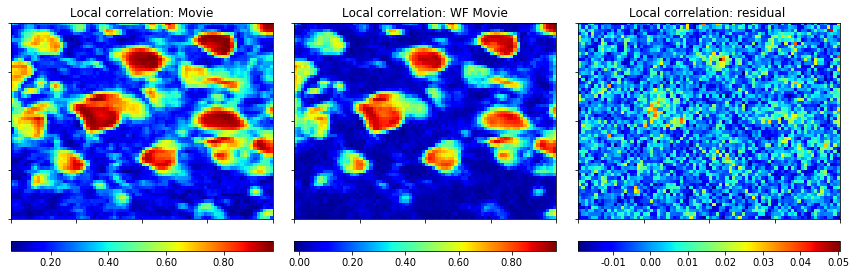

In [4]:
util_plot.comparison_plot([mov, mov_wf],
                          option='corr',
                          titles_=['Movie', 'WF Movie'],
                          plot_orientation='vertical',
                          cbar_orientation='horizontal'
                         )

In [5]:
mov_mean  = mov.mean(2,keepdims=True)
mov = mov - mov_mean
noise_level = denoise.noise_level(mov,
                                  range_ff=[0.25,0.5])
mov_nn = mov/noise_level[:,:,np.newaxis]

In [6]:
n_components = 6
dims = mov_nn.shape
M = mov_nn.reshape((np.prod(dims[:2]),dims[2]))
R =gpca.compute_svd(M,
                    method='randomized',
                    n_components=n_components,
                    reconstruct=True).reshape(dims)
D = mov_nn - R

# Choosing Block Size

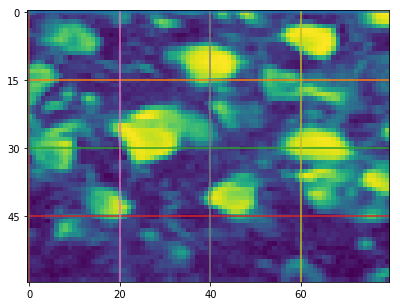

In [ ]:
nblocks=[4,4]
Cn1,_ = util_plot.correlation_pnr(mov_nn)
util_plot.tiling_grid_plot(Cn1,
                           nblocks=nblocks,
                           plot_option='same')

# Denoise With GPCA

Runtime 

In [ ]:
nblocks =[2,2]
mov_d_gpca_t0,ranks_gpca_t0 = denoise.temporal(D,
                               nblocks=nblocks,
                               min_rank=1,
                               greedy= True,
                                snr_threshold=0,
                               dx=1)